**Dataset Link:** https://www.kaggle.com/datasets/salader/dogs-vs-cats

### **To fetch dataset from kaggle**

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
# Dataset API Command

!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:27<00:00, 50.2MB/s]
100% 1.06G/1.06G [00:27<00:00, 42.2MB/s]


In [7]:
# To unzip file

import zipfile

zip_ref = zipfile.ZipFile(file="/content/dogs-vs-cats.zip", mode='r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
# Import all necessary library

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

**Generators:** https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

In [9]:
# Create Generators
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory="/content/train", 
    labels='inferred', 
    label_mode='int', 
    batch_size=32, 
    image_size=(256, 256)
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory="/content/test", 
    labels='inferred', 
    label_mode='int', 
    batch_size=32, 
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [11]:
# Normalize the image pixel values

def normalize_process(image, label):
    image = tf.cast(x=image/255, dtype=tf.float32)
    return image, label

In [12]:
train_ds = train_ds.map(map_func=normalize_process)

validation_ds = validation_ds.map(map_func=normalize_process)

## **Create CNN model**

In [13]:
model = Sequential()

In [14]:
# 254 * 254 * 32
model.add(layer=Conv2D(filters=32, kernel_size=(3,3),strides=(1,1),
                       padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(layer=BatchNormalization())
# 127 * 127 * 32
model.add(layer=MaxPooling2D(pool_size=(2,2),strides=None, padding="valid"))


# 125 * 125 * 64
model.add(layer=Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),
                       padding="valid",activation="relu"))
model.add(layer=BatchNormalization())
# 62 * 62 * 64
model.add(layer=MaxPooling2D(pool_size=(2,2),strides=None, padding="valid"))


# 60 * 60 * 128
model.add(layer=Conv2D(filters=128, kernel_size=(3,3),strides=(1,1),
                       padding="valid",activation="relu"))
model.add(layer=BatchNormalization())
# 30 * 30 * 128
model.add(layer=MaxPooling2D(pool_size=(2,2),strides=None, padding="valid"))

model.add(layer=Flatten())

model.add(layer=Dense(units=128, activation="relu"))
model.add(layer=Dropout(0.1))
model.add(layer=Dense(units=64, activation="relu"))
model.add(layer=Dropout(0.2))
model.add(layer=Dense(units=1, activation="sigmoid"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

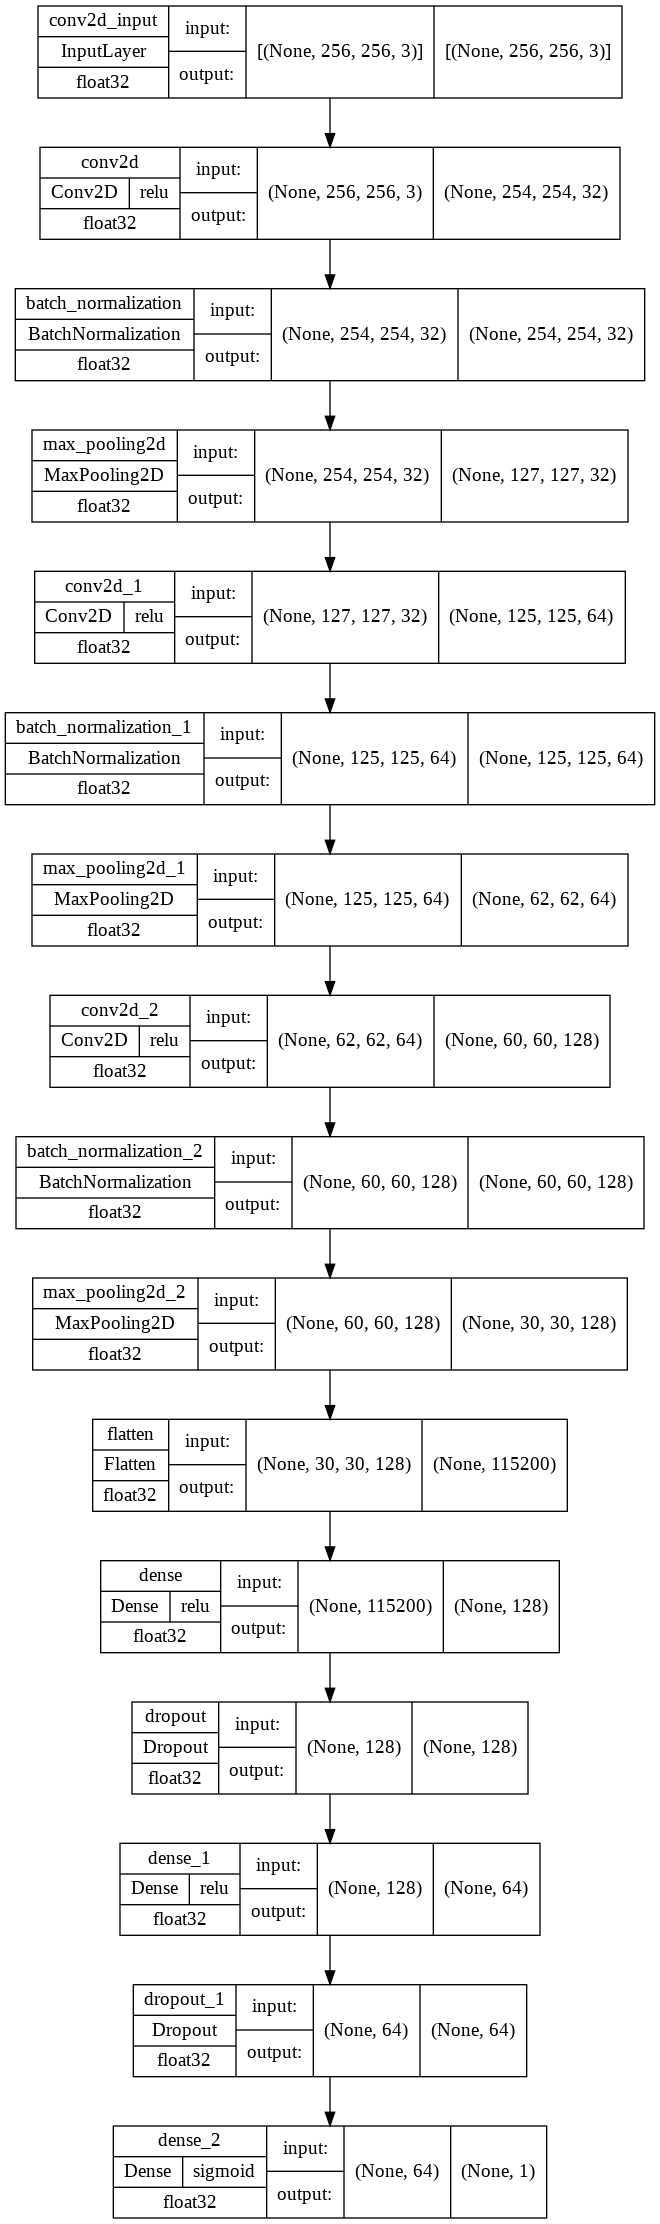

In [16]:
tf.keras.utils.plot_model(model=model, 
                          show_shapes=True,
                          show_dtype=True,
                          expand_nested=True,
                          show_layer_activations=True)

In [17]:
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=['accuracy'])

In [18]:
history = model.fit(x=train_ds, epochs=20, validation_data=validation_ds)

Epoch 1/20
625/625 [==============================] - 82s 110ms/step - loss: 1.5200 - accuracy: 0.5666 - val_loss: 1.0098 - val_accuracy: 0.5362
Epoch 2/20
625/625 [==============================] - 69s 110ms/step - loss: 0.6126 - accuracy: 0.6707 - val_loss: 0.6149 - val_accuracy: 0.6962
Epoch 3/20
625/625 [==============================] - 69s 109ms/step - loss: 0.5281 - accuracy: 0.7394 - val_loss: 0.6054 - val_accuracy: 0.6466
Epoch 4/20
625/625 [==============================] - 69s 110ms/step - loss: 0.4623 - accuracy: 0.7844 - val_loss: 0.6837 - val_accuracy: 0.6756
Epoch 5/20
625/625 [==============================] - 69s 110ms/step - loss: 0.4242 - accuracy: 0.8109 - val_loss: 0.4912 - val_accuracy: 0.7610
Epoch 6/20
625/625 [==============================] - 69s 109ms/step - loss: 0.3552 - accuracy: 0.8485 - val_loss: 0.4524 - val_accuracy: 0.8090
Epoch 7/20
625/625 [==============================] - 69s 110ms/step - loss: 0.2805 - accuracy: 0.8835 - val_loss: 0.4742 - val_ac

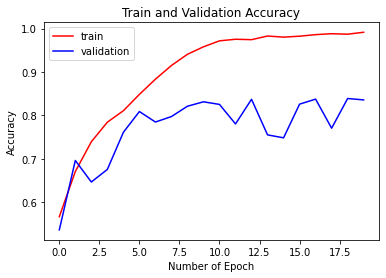

In [19]:
plt.plot(history.history['accuracy'], color='red',label='train')
plt.plot(history.history['val_accuracy'], color='blue',label='validation')
plt.title(label="Train and Validation Accuracy")
plt.xlabel(xlabel="Number of Epoch")
plt.ylabel(ylabel="Accuracy")
plt.legend()
plt.show()

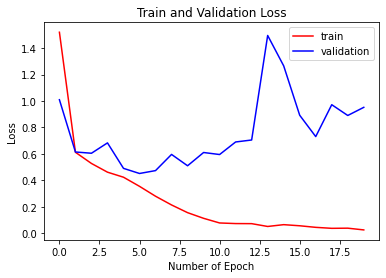

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title(label="Train and Validation Loss")
plt.xlabel(xlabel="Number of Epoch")
plt.ylabel(ylabel="Loss")
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout ------------ Used
# Batch Norm ------------ Used
# Reduce complexity

# Here you can also use transfer learning technique

In [21]:
import cv2

In [50]:
test_img = cv2.imread('/content/cat.jpg')

In [51]:
type(test_img)

numpy.ndarray

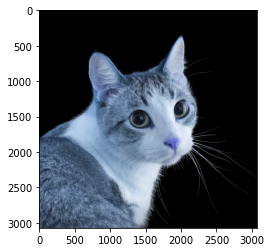

In [52]:
plt.imshow(test_img)

In [53]:
test_img.shape

(3072, 3072, 3)

In [54]:
test_img = cv2.resize(test_img,(256,256))

In [55]:
test_input = test_img.reshape((1,256,256,3))

In [56]:
model.predict(test_input)

array([[0.]], dtype=float32)

In [57]:
# loss: 0.0259 - accuracy: 0.9917 - val_loss: 0.9524 - val_accuracy: 0.8358

# model.save("cats_vs_dogs.h5")